You need to predict the happiness score considering all the other factors mentioned in the dataset.

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [2]:
# Read dataset from URL & Store in DataFrame

df_raw_HI= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

df_raw_HI.head(4)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [3]:
# Check columns
df_raw_HI.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

**NON GRAPHICAL ANALYSIS**

In [4]:
# Check Dimensions

df_raw_HI.shape

(158, 12)

158 Rows, 12 columns  ===> 1 target Variabe : happiness Score,

11 independent variables

In [5]:
# Check datatype & nulls

df_raw_HI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

**No null values in any of the dataset found in any columns**

**Country: Object Datatype & happiness Rank: Integer Datatype can be dropped**

<Axes: >

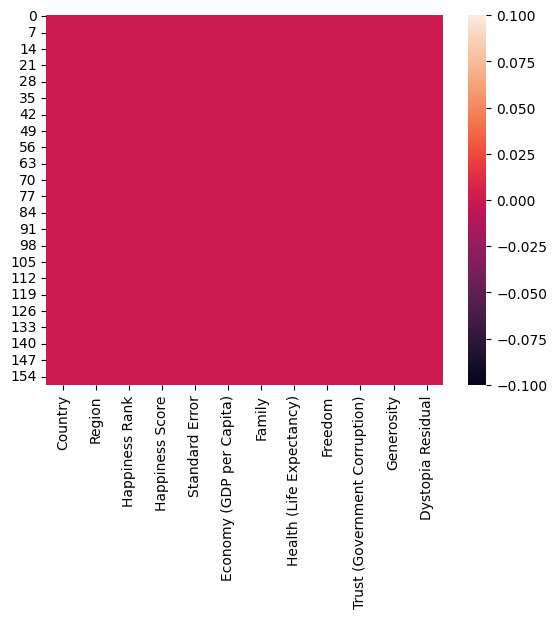

In [6]:
# Visualizing null values using heat map
sns.heatmap(df_raw_HI.isnull())

In [7]:
# Creating a new DF excluding Country & Happiness Rank from dataset

df_HI  = df_raw_HI.drop(['Country', 'Happiness Rank'], axis=1)

df_HI.head(3)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [8]:
# Checking stats summary

df_HI.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Std deviation for all independent variables are within permissible limits

In [9]:
# Finding the number of unique values in a column

for index in df_HI.columns.to_list():

  print(index,':', df_HI[index].nunique())

Region : 10
Happiness Score : 157
Standard Error : 153
Economy (GDP per Capita) : 158
Family : 158
Health (Life Expectancy) : 157
Freedom : 158
Trust (Government Corruption) : 157
Generosity : 158
Dystopia Residual : 158


**Region has only 10 unique values, hence it is categorical, rest have higher number of unique values hence can be considered as numeric & continous**

In [10]:
# Encoding the Region column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_HI['Region'] = le.fit_transform(df_HI['Region'])

df_HI.head(3)

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


# GRAPHICAL ANALYSIS

1. Univariate Graphical Analysis

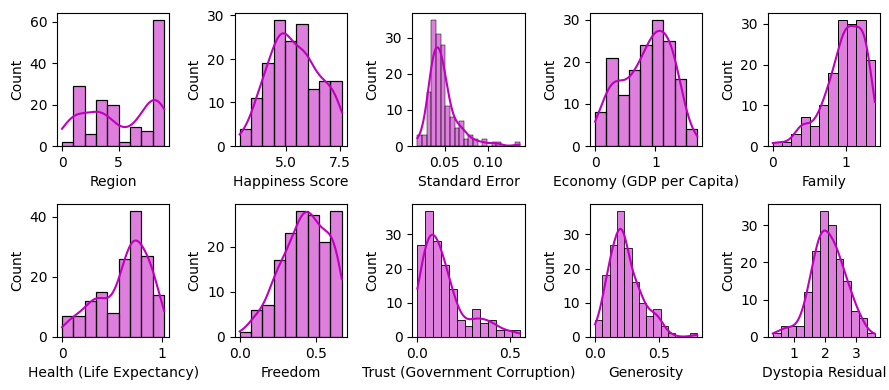

In [13]:
# Check distribution of various labels

mp.figure(figsize=(9,4))
pnum = 1

for index in df_HI.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.histplot(df_HI[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Moderate Skewness can be seen in all float column except Dystopia Residue

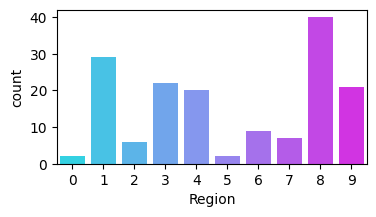

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64


In [14]:
# Check number of regions

mp.figure(figsize=(4,2))
sns.countplot(x=df_HI['Region'], palette = 'cool')
mp.show()

print(df_HI['Region'].value_counts())

Number of sample points from each region

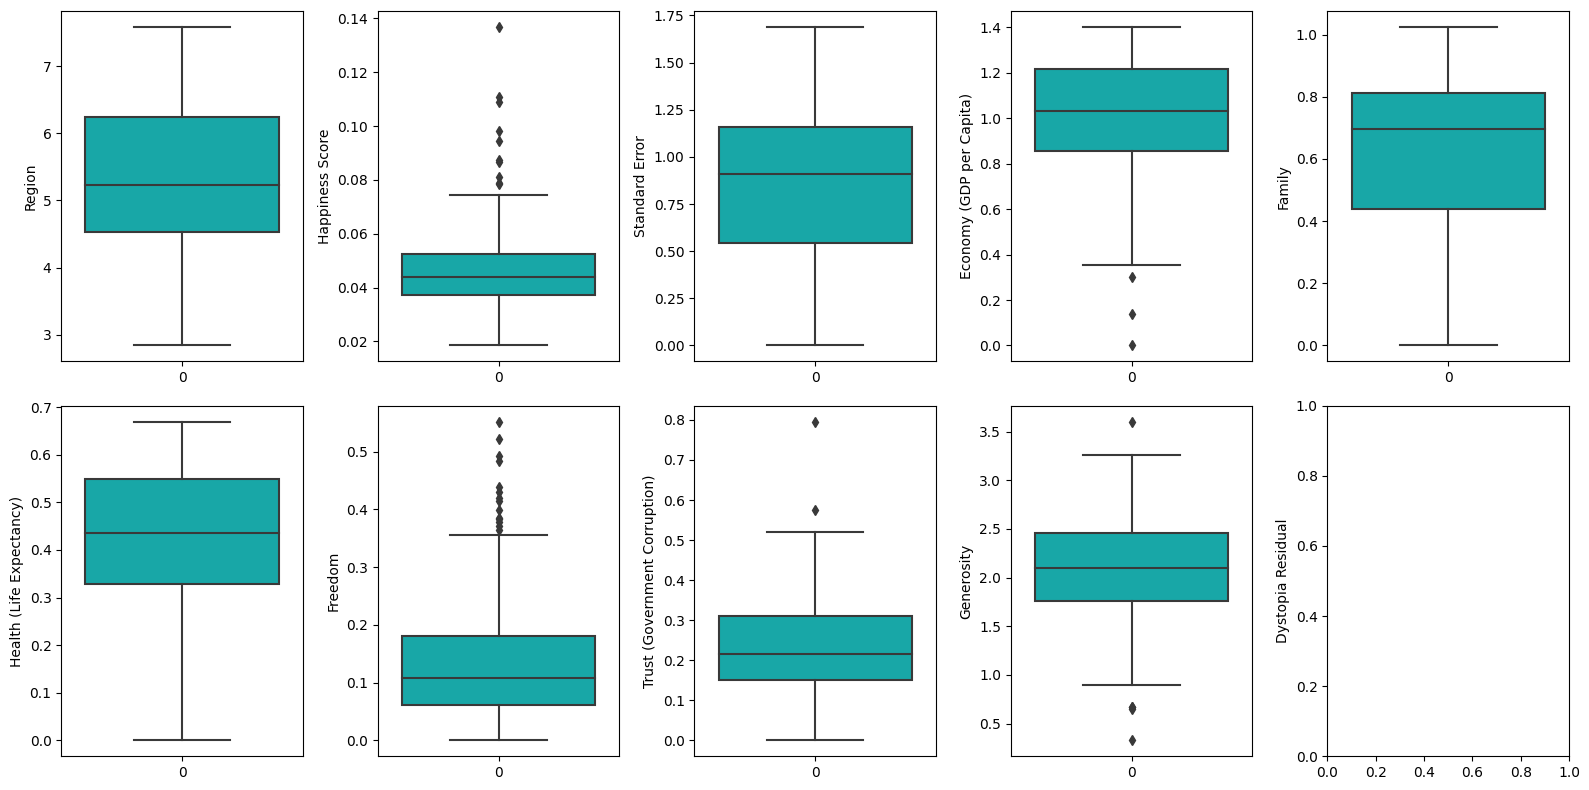

In [15]:
# Box plot analysis to viualize outliers

mp.figure(figsize=(16,8))
pnum = 1

for index in df_HI.columns.to_list():
  if(pnum<=10):
    sns.boxplot(df_HI[index], color = 'c')
    ax = mp.subplot(2,5,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

Outliers can be seen in columns: Freedom , Economy

# BIVARIATE ANALYSIS

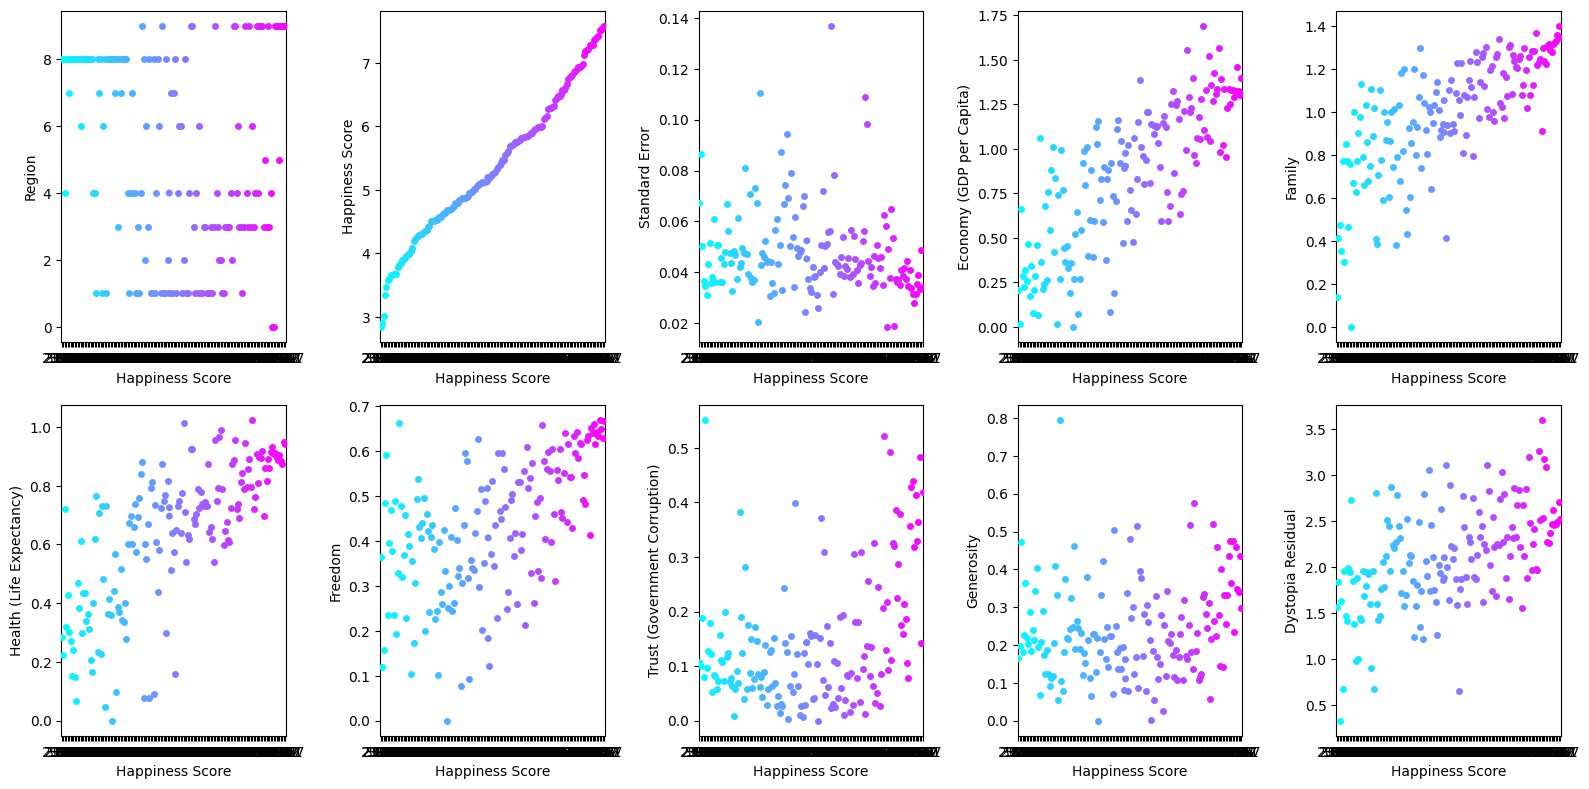

In [16]:
# Stripplot to understand relation of Happiness Score with other variables

mp.figure(figsize=(16,8))
pnum = 1

for index in df_HI.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.stripplot(x=df_HI['Happiness Score'], y =df_HI[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

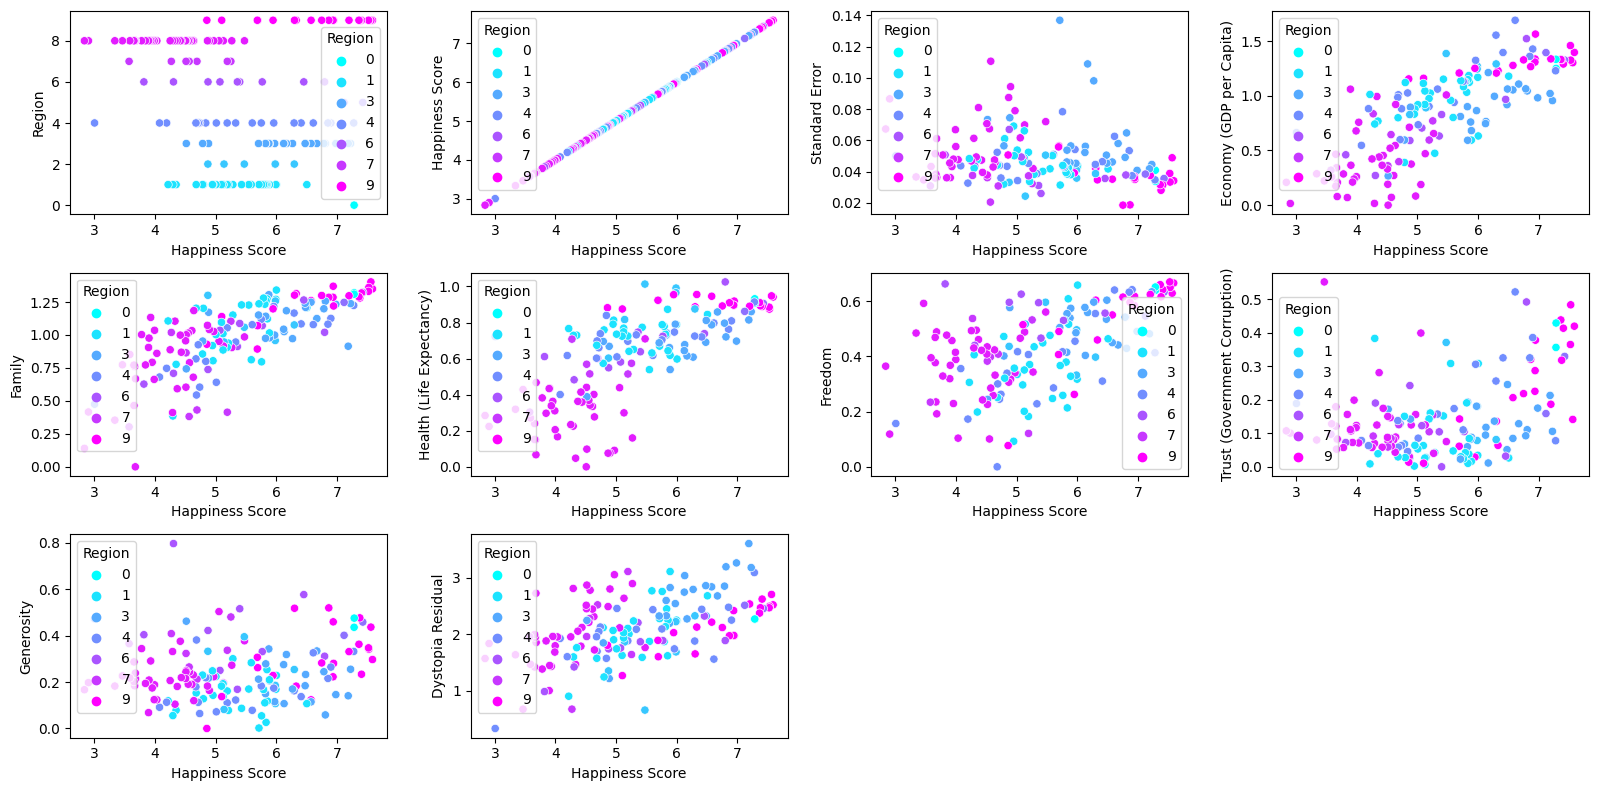

In [17]:
# Scatter plot to understand relation between Happiness score and other variables

mp.figure(figsize=(16,8))
pnum = 1

for index in df_HI.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.scatterplot(x=df_HI['Happiness Score'], y =df_HI[index], palette = 'cool', hue =df_HI['Region'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Positive Correlation with Happiness Scoe can be seen Economy, Health, Family & Dystopia Residual Score

---



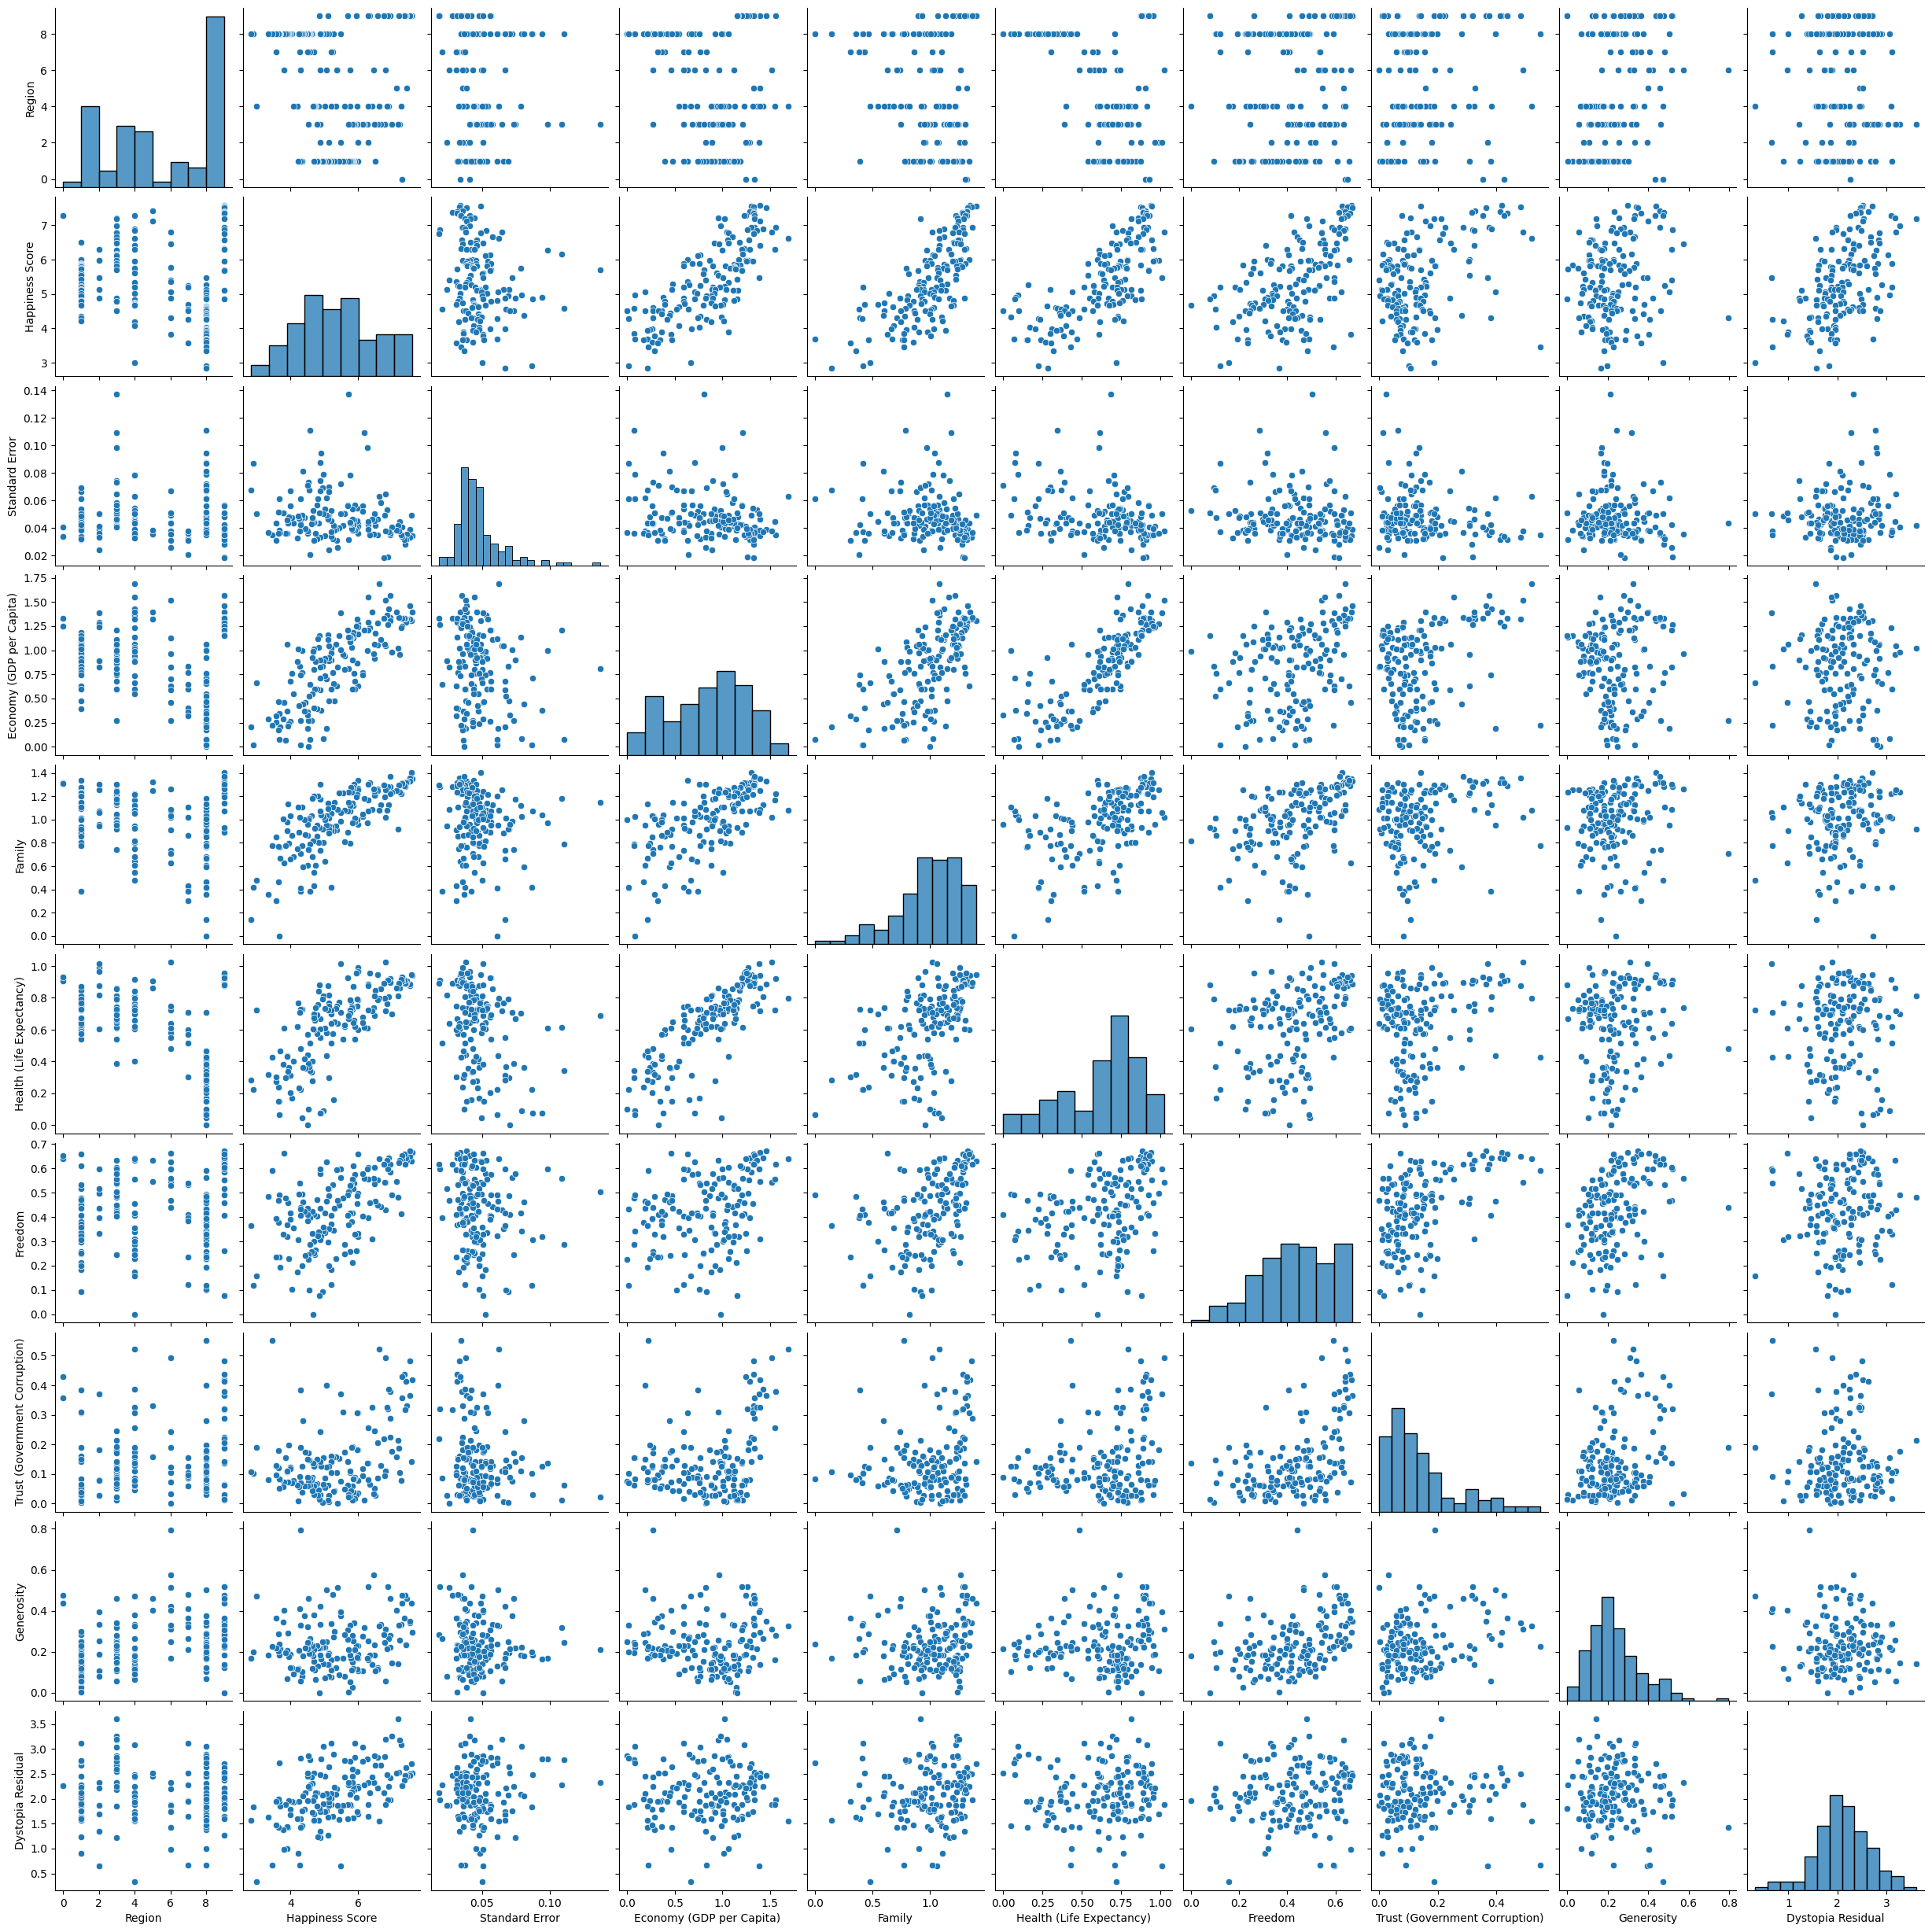

In [18]:
# Pairplot for entire visualization

sns.pairplot(df_HI)

<Axes: >

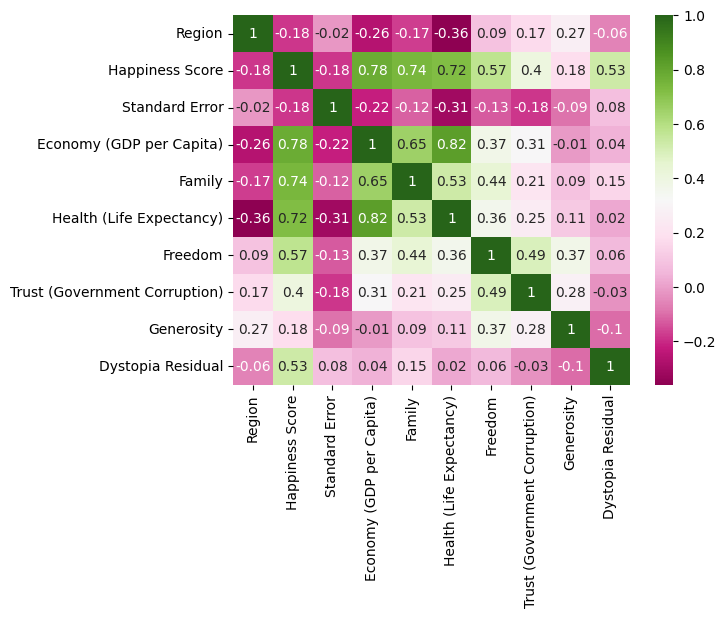

In [19]:
# Heat map of correlations

sns.heatmap(round(df_HI.corr(),2), cmap = 'PiYG', annot = True)

Happiness Score has strong +ve correlation with Economy, Family, Health

Economy has positive correlation with Health, family, happiness score



# CHECK OUTLIERS

In [20]:
# Separateing Independent variable to check for outliers

df_features = df_HI.drop('Happiness Score', axis =1)
df_target = df_HI['Happiness Score']

df_features.sample(2)

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
7,9,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
107,4,0.04394,0.59867,0.92558,0.66015,0.24499,0.12905,0.11251,2.04384


(149, 10)


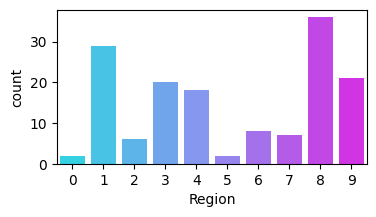

8    36
1    29
9    21
3    20
4    18
6     8
7     7
2     6
5     2
0     2
Name: Region, dtype: int64


In [21]:
# Removing Outliers where |Z-score| > 3

df_HI_ZS = df_HI[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print(df_HI_ZS.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_HI_ZS['Region'], palette = 'cool')
mp.show()
print(df_HI_ZS['Region'].value_counts())

Z-Score method removes 8 rows considering them as outliers

(126, 10)


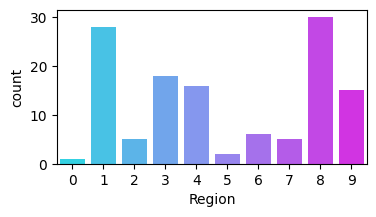

8    30
1    28
3    18
4    16
9    15
6     6
2     5
7     5
5     2
0     1
Name: Region, dtype: int64


In [22]:
# Removing Outliers using IQR

Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5

lower_bound = Q1 - (threshold * IQR)
upper_bound = Q3 + (threshold * IQR)

# Identify and remove outliers
mask = ((df_features >= lower_bound) & (df_features <= upper_bound)).all(axis=1)
df_HI_IQR = df_HI[mask]

print(df_HI_IQR.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_HI_IQR['Region'], palette = 'cool')
mp.show()
print(df_HI_IQR['Region'].value_counts())

Large amount of data is identified as outliers and are being removed in IQR method hence, taking Z-Score filtered data for further analysis

# SKEWNESS

In [23]:
# check skewness

df_HI_ZS.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Acceptable limits of absolute of skewness < =1

Removing skewness from Trust & Standard Error


In [24]:
df_HI_ZS['Standard Error'] = np.cbrt(df_HI_ZS['Standard Error'])
df_HI_ZS['Trust (Government Corruption)'] = np.cbrt(df_HI_ZS['Trust (Government Corruption)'])

df_HI_ZS.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   0.528395
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)   -0.064568
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Skewness has been removed by cuberoot transformation method, now all columns are having skewness within acceptable limits

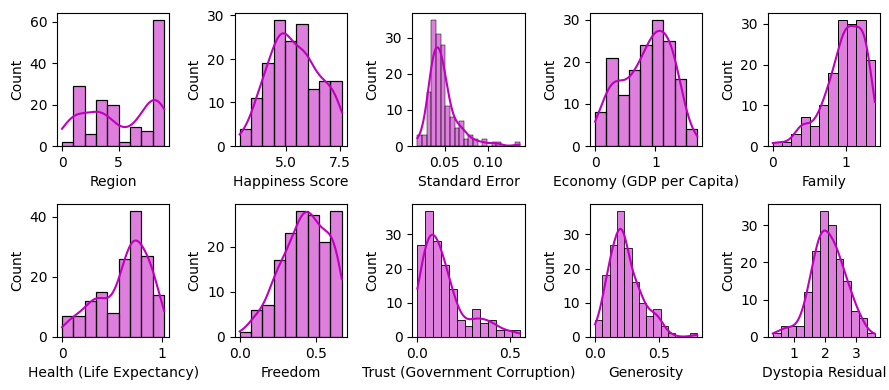

In [25]:
# Checking histogram again
mp.figure(figsize=(9,4))
pnum = 1

for index in df_HI.columns.to_list():
  if(pnum<=10):
    ax = mp.subplot(2,5, pnum)
    sns.histplot(df_HI[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

**CHECK FOR MULTI-COLLINEARITY: USE VIF**

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_inp = df_HI_ZS.drop('Happiness Score', axis =1)
df_tar = df_HI_ZS['Happiness Score']

vif = pd.DataFrame()
vif['Feature'] = df_inp.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_inp.values,i) for i in range(len(df_inp.columns))]

vif

,Feature,VIF Val
0,Region,5.065152
1,Standard Error,28.109196
2,Economy (GDP per Capita),24.392071
3,Family,32.682597
4,Health (Life Expectancy),26.586816
5,Freedom,17.567530
6,Trust (Government Corruption),17.533724
7,Generosity,6.919143
8,Dystopia Residual,17.255826


VIF is high for Family, dropping the column & recalculating the VIF





In [27]:
df_inp.drop('Family', axis=1, inplace = True)

vif = pd.DataFrame()
vif['Feature'] = df_inp.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_inp.values,i) for i in range(len(df_inp.columns))]

vif

,Feature,VIF Val
0,Region,5.062893
1,Standard Error,23.439802
2,Economy (GDP per Capita),19.856518
3,Health (Life Expectancy),26.519416
4,Freedom,15.778430
5,Trust (Government Corruption),17.301515
6,Generosity,6.854658
7,Dystopia Residual,16.735324


VIF is high for Health, dropping the column & recalculating the VIF

In [28]:
df_inp.drop('Health (Life Expectancy)', axis=1, inplace = True)

vif = pd.DataFrame()
vif['Feature'] = df_inp.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_inp.values,i) for i in range(len(df_inp.columns))]

vif

,Feature,VIF Val
0,Region,4.616568
1,Standard Error,22.935475
2,Economy (GDP per Capita),7.329265
3,Freedom,15.543331
4,Trust (Government Corruption),17.284651
5,Generosity,6.364084
6,Dystopia Residual,16.508277


VIF is high for Std Error, dropping the column & recalculating the VIF

In [29]:
df_inp.drop('Standard Error', axis=1, inplace = True)

vif = pd.DataFrame()
vif['Feature'] = df_inp.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_inp.values,i) for i in range(len(df_inp.columns))]

vif

,Feature,VIF Val
0,Region,4.418726
1,Economy (GDP per Capita),7.123050
2,Freedom,15.524549
3,Trust (Government Corruption),16.256079
4,Generosity,6.324184
5,Dystopia Residual,9.696095


Rest can be considered within permissible limit

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score

x_df = df_inp
y_df = df_tar

print(x_df.shape)
print(y_df.shape)

(149, 6)
(149,)


**Applying Ridge Model**

In [31]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  RG = Ridge(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    RG.fit(x_train, y_train)
    predict = RG.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 0.03729444651066422 bst_aplha 0.1 r2_scr: 0.9639756746991608


**Applying Lasso Model**



In [32]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  LS= Lasso(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    LS.fit(x_train, y_train)
    predict = LS.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 0.03703540181665469 bst_aplha 0.001 r2_scr: -0.00012875752879892843


**Applying Elastic Net**

In [33]:
alpha = [0.001, 0.01, 0.1, 1]

min_mse = 999999999999999999999999
bst_rs = 0
bst_alpha = 0


for a in alpha:
  EN =  ElasticNet(a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    EN.fit(x_train, y_train)
    predict = EN.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_alpha = a


print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)


Least MSE at random state =  69 mse: 0.03714040634023938 bst_aplha 0.001 r2_scr: -0.00012875752879892843


**Applying Linear Model**

In [34]:
min_mse = 999999999999999999999999
bst_rs = 0
LR = LinearRegression()


for i in range(1,70):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
  LR.fit(x_train, y_train)
  predict = LR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

if(msq_err <= min_mse):

  min_mse = msq_err
  bst_rs = i


print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "bst_aplha", bst_alpha, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 0.037799499627679284 bst_aplha 0.001 r2_scr: 0.9702168618096979


**Applying Decision Tree Regressor**

In [35]:
from sklearn.tree import DecisionTreeRegressor
alpha = [3,5,7]
bst_max_depth = 0
min_mse = 999999999999999999999999
bst_rs = 0



for a in alpha:
  DTR = DecisionTreeRegressor(max_depth=a)

  for i in range(1,70):

    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    LS.fit(x_train, y_train)
    predict = LS.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):

    min_mse = msq_err
    bst_rs = i
    bst_max_depth = a

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "max_depth", bst_max_depth, "r2_scr:", r2_sc)

Least MSE at random state =  69 mse: 1.2693211291666666 max_depth 7 r2_scr: -0.00012875752879892843


**Applying Random Forest Regressor**

In [36]:
from sklearn.ensemble import RandomForestRegressor

min_mse = 999999999999999999999999
bst_rs = 0
bst_nest = 0

for n in range(10,100,5):
  RFR = RandomForestRegressor(n_estimators=n)

  for i in range(1,70):
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.3)
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    msq_err = mean_squared_error(y_test, predict)
    r2_sc = r2_score(y_test, predict)

    if(msq_err <= min_mse):
      min_mse = msq_err
      bst_rs = i
      bst_nest = n

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse,  "r2_scr:", r2_sc, "bst_nest:",  n)

Least MSE at random state =  1 mse: 0.06900425472395087 r2_scr: 0.8926690418262303 bst_nest: 95


Lasso Model is giving better fits compared to other models on basis of Mean Squared Error and r2 Score

Lasso : random State = 69, MSE =0.03703,  bst_aplha 0.001
r2_scr: -0.0001287575

**Creating the best model on basis of various Analysis**

In [38]:
LSO= Lasso(0.001)


x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 69, test_size = 0.3)
LSO.fit(x_train, y_train)
predict = LSO.predict(x_test)
msq_err = mean_squared_error(y_test, predict)
r2_sc = r2_score(y_test, predict)

print(r2_sc, msq_err)

0.97081891291939 0.03703540181665469


# Saving the Model

In [40]:
import joblib

# Saving the Lasso Model

joblib.dump(LSO, 'Dystopia_H_Score.mdl')

['Dystopia_H_Score.mdl']

# Checking the Predictions

In [41]:
# Load the saved model

load_DHS = joblib.load('Dystopia_H_Score.mdl')

DHS = load_DHS

**Function to predict happiness Scores**

In [42]:
# Function to Predict Happiness Score

def pred_HS(input):
  inp = np.array(input)
  Happiness_Score  =  DHS.predict(inp.reshape(1, -1))

  return Happiness_Score

**Running the model for predicting Happiness Score**

In [43]:
# Running the Model for prediction

tst_inpt1 = [1,0.95847,0.47610,0.675653,0.16979,1.86984]    # Row ID 69
tst_inpt2 = [8,0.28520,0.32878,0.385905,0.34377,1.38079]    # Row ID 145
tst_inpt3 = [6,0.96690,0.55664,0.317050,0.57630,2.31945]    # Row ID 33


print("Predicted Happiness Score:", round(pred_HS(tst_inpt1)[0],3))
print("Predicted Happiness Score:", round(pred_HS(tst_inpt2)[0],3))
print("Predicted Happiness Score:", round(pred_HS(tst_inpt3)[0],3))


Predicted Happiness Score: 5.511
Predicted Happiness Score: 3.474
Predicted Happiness Score: 6.431


**Comparing predicted scores with dataset**

In [44]:
print(df_tar[69],df_tar[145], df_tar[33])

5.548 3.781 6.455


# Summary

The model seems to be predicting well, with very minimal difference